稀疏矩阵（英语：sparse matrix）指的是在数值分析中绝大多数数值为零的矩阵。反之，如果大部分元素都非零，则这个矩阵是稠密的(Dense)。

在科学与工程领域中求解线性模型时经常出现大型的稀疏矩阵。
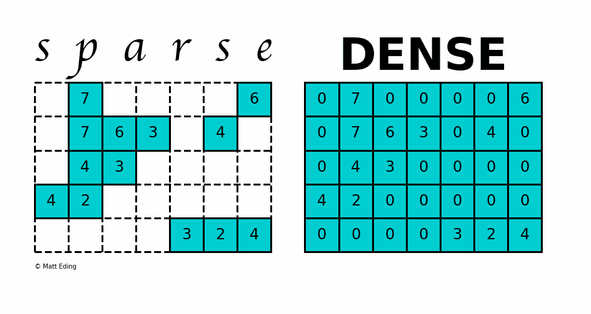

SciPy 的 scipy.sparse 模块提供了处理稀疏矩阵的函数。

我们主要使用以下两种类型的稀疏矩阵：

CSC - 压缩稀疏列（Compressed Sparse Column），按列压缩。
CSR - 压缩稀疏行（Compressed Sparse Row），按行压缩。

CSR（Compressed Sparse Row）和CSC（Compressed Sparse Column）是两种稀疏矩阵的存储格式。对于稀疏矩阵，使用CSR或CSC格式存储可以大大减少内存占用。这是因为这两种格式都只存储矩阵中的非零元素，而不是像普通矩阵那样存储所有元素。此外，使用CSR或CSC格式还可以加快稀疏矩阵的计算速度。例如，对于矩阵乘法等运算，使用CSR或CSC格式可以避免对零元素的无用计算，从而提高计算效率。总之，对稀疏矩阵使用CSR或CSC格式存储可以减少内存占用并加快计算速度。

CSR格式按行存储非零元素，即先存储第一行的非零元素，然后存储第二行的非零元素，依此类推。因此，CSR格式适用于按行访问矩阵的情况。

相反，CSC格式按列存储非零元素，即先存储第一列的非零元素，然后存储第二列的非零元素，依此类推。因此，CSC格式适用于按列访问矩阵的情况。


本章节我们主要使用 CSR 矩阵。

CSR 矩阵
我们可以通过向 scipy.sparse.csr_matrix() 函数传递数组来创建一个 CSR 矩阵。

可以把三维及以上的数组传给csr_matrix吗？不可以。csr_matrix是SciPy库中的一个类，它用于创建和操作CSR格式的稀疏矩阵。csr_matrix只接受二维数组作为输入，不能直接处理三维及以上的数组。

如果您有一个三维或更高维度的数组，您可以通过将其转换为二维数组来使用csr_matrix。例如，您可以使用NumPy中的reshape函数将三维数组转换为二维数组，然后再将其传递给csr_matrix。

In [4]:
import numpy as np
from scipy.sparse import csr_matrix

arr=np.array([0, 0, 0, 0, 0, 1, 1, 0, 2])
print(csr_matrix(arr))
print(csr_matrix(arr).data)

  (0, 5)	1
  (0, 6)	1
  (0, 8)	2
[1 1 2]


结果解析：

第一行：在矩阵第一行（索引值 0 ）第六（索引值 5 ）个位置有一个数值 1。

第二行：在矩阵第一行（索引值 0 ）第七（索引值 6 ）个位置有一个数值 1。

第三行：在矩阵第一行（索引值 0 ）第九（索引值 8 ）个位置有一个数值 2。

CSR 矩阵方法
我们可以使用 data 属性查看存储的数据（不含 0 元素）：

In [2]:
arr=np.array([[0, 0, 0], [0, 0, 1], [1, 0, 2]])
print(csr_matrix(arr).data)

[1 1 2]


使用 count_nonzero() 方法计算非 0 元素的总数：

In [5]:
arr=np.array([[0, 0, 0], [0, 0, 1], [1, 0, 2]])
print(csr_matrix(arr).count_nonzero())

3


使用 eliminate_zeros() 方法删除矩阵中 0 元素：

In [6]:
arr = np.array([[0, 0, 0], [0, 0, 1], [1, 0, 2]])

mat=csr_matrix(arr)
mat.eliminate_zeros()
print(mat)

  (1, 2)	1
  (2, 0)	1
  (2, 2)	2


使用 sum_duplicates() 方法来删除重复项:

In [8]:
arr=np.array([[0, 0, 0], [0, 0, 1], [1, 0, 2]])

mat=csr_matrix(arr)
mat.sum_duplicates()
print(mat)

  (1, 2)	1
  (2, 0)	1
  (2, 2)	2


csr 转换为 csc 使用 tocsc() 方法：

In [9]:
arr = np.array([[0, 0, 0], [0, 0, 1], [1, 0, 2]])

newarr=csr_matrix(arr).tocsc()
print(newarr)

  (2, 0)	1
  (1, 2)	1
  (2, 2)	2
